In [5]:
include("../continuous_hopfield.jl")
using Plots
using LaTeXStrings
using Random, Distributions
using LinearAlgebra

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [6]:
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([1.2635027799122753, 1.0577224340265294, 0.40584452172397434, 0.8896988741262173, 0.4047714450837884, -1.908582007139247, -0.3758747641944676, -0.009079936832291535, -2.117844313999521, -0.04580431242907978, 0.6008120583021278, -0.8111602909657417, 0.8155615106077502, 0.18784605620614497, 0.3463498736344593, -0.02829065306553232, -0.9712824156439486, -0.6439896210756074, -0.7587329218824996, -0.11411398462947137], [-2.019963872096978, 1.0942756327569412, -1.2636263651658601, 0.36353061836817624, -0.536682592712277, -1.404455304573953, 2.10041157271489, -0.9911887402921957, -0.7673606391400042, -1.2743634395880716, 1.0060930933968004, -0.6926769496884412, -0.4663808516404579, -0.1606157948907276, -0.48534435725562314, 0.9828049756838723, -0.5179376946280966, -0.9124557983872451, -0.1029438688044324, 0.07965518169967922], [-0.46317427101674974, 0.6597843100631633, -0.22189061508818733, 0.6929394451506402, -0.9233066966251154, -0.553206251815194, 0.169855007409735, 0.4520716627945779, -0

In [17]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = CH.energy1(σ_new, ξ)
    end
end

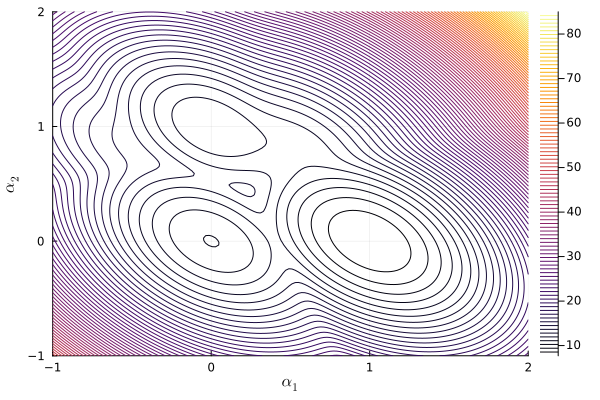

In [18]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = L"α_1", ylabel = L"α_2")


In [16]:
CH.energy1(σ1, ξ)

10.224352502031417

In [15]:
CH.energy1(σ2, ξ)

7.706658779647077

In [14]:
CH.energy1(σ3, ξ)

11.17452209045042

In [2]:
N = 20
α = 0.2
M = round(Int, exp(N*α))
println(M)
ξ = CH.generate_patterns(M, N)
σ = ξ[:, 1]
σ_new = CH.perturb(σ, 1.0)
CH.distance(σ_new, σ)

55


3.2520812612778527

In [3]:
σ_rec = CH.update(σ_new, ξ; β = 10, nsweeps = 1)
CH.distance(σ_rec, σ)

0.0

In [4]:
distances = vec(mapslices(x -> CH.distance(σ_rec, x), ξ, dims = 1) )

55-element Vector{Float64}:
 0.0
 9.080110976656602
 6.40633880963043
 6.853459612478605
 5.948197382874252
 5.514509548858004
 5.358410212939096
 6.019660381090324
 5.172612966824824
 7.426166166440651
 7.524136027714979
 6.740704733484567
 6.9219654194284
 ⋮
 6.313193894304416
 6.897251309691959
 6.510072671237642
 7.7581988209017405
 5.334417810863843
 7.813868459577327
 6.212340547873598
 5.997887870523291
 5.524325298913282
 7.111219383755163
 5.337193112920124
 7.147598810234287

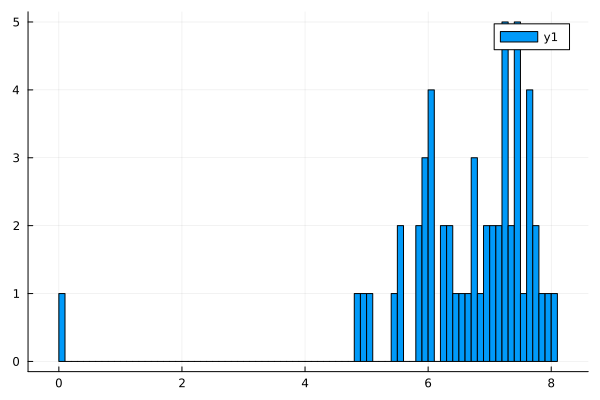

In [71]:
histogram(distances, nbins = 100)

In [73]:
minimum(distances)

0.0

In [6]:
vec(sum(ξ.^2, dims = 1))

30-element Vector{Float64}:
 17.657271996608415
 26.95431407591433
  5.381154819209373
 14.784838426209387
  9.2644104011502
 12.573792390176076
 19.446757907338153
 30.185192527712257
  9.984835737220935
 12.168669830789721
 18.560541188416142
 14.320947617779524
 31.499271327226914
  ⋮
 17.753910702413307
 23.56769704790987
 27.903217803035442
 17.720784082651104
 10.323353896298471
 20.59427407995022
 18.50736288118009
 13.521290122672369
 29.231699118774397
  5.4240784088924565
 16.091952918816183
 16.02015742166516